In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import urllib3
from scipy.stats import poisson

from random import randint
from statistics import mode
from PIL import Image
import sqlite3
from tabulate import tabulate

In [4]:
con = sqlite3.connect("../Soccer_Dashboard/Database/Shots22_23.db")
cur = con.cursor()



In [5]:
data = pd.read_sql("Select * from Matches where matchid =4060605 ", con)
data

,index,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,...,isOwnGoal,firstName,lastName,teamColor,shortName,matchId,Venue,onGoalShot_X,onGoalShot_Y,onGoalShot_ZR
0,0,2520483161,AttemptSaved,8633,26166,Karim Benzema,89.900002,21.336815,6,NaN,...,0,Karim,Benzema,#085098,None,4060605,Home,4.351852e-01,0.095127,1.000000
1,1,2520483521,AttemptSaved,8650,950561,Darwin Nunez,91.500000,30.232000,7,NaN,...,0,Darwin,Nunez,#d3171e,None,4060605,Away,1.121032e+00,0.032275,1.000000
2,2,2520484353,Miss,8633,743533,Federico Valverde,81.471358,21.617071,8,NaN,...,0,Federico,Valverde,#085098,None,4060605,Home,0.000000e+00,0.050425,0.267430
3,3,2520485797,AttemptSaved,8633,743533,Federico Valverde,85.172060,18.324076,11,NaN,...,0,Federico,Valverde,#085098,None,4060605,Home,1.326058e-01,0.117210,1.000000
4,4,2520485887,AttemptSaved,8633,95078,Toni Kroos,79.894657,36.592501,11,NaN,...,0,Toni,Kroos,#085098,None,4060605,Home,3.746693e-01,0.236118,1.000000
5,5,2520487161,AttemptSaved,8633,846033,Vinicius Junior,103.198274,29.463571,14,NaN,...,0,Vinicius,Junior,#085098,Vinicius,4060605,Home,1.262235e+00,0.377109,1.000000
6,6,2520489329,Miss,8650,570461,Diogo Jota,92.400002,28.286906,18,NaN,...,0,Diogo,Jota,#d3171e,None,4060605,Away,-2.220446e-16,0.017688,0.125456
7,7,2520490087,AttemptSaved,8633,1015185,Eduardo Camavinga,76.853883,40.301428,20,NaN,...,0,Eduardo,Camavinga,#085098,None,4060605,Home,1.443783e+00,0.569062,1.000000
8,8,2520491247,Miss,8633,31097,Luka Modric,78.317965,29.295475,22,NaN,...,0,Luka,Modric,#085098,None,4060605,Home,5.875348e-01,0.677249,0.786441
9,9,2520493099,Miss,8650,806552,Cody Gakpo,93.500000,30.280000,26,NaN,...,0,Cody,Gakpo,#d3171e,None,4060605,Away,-2.220446e-16,0.027337,0.287373


In [6]:

data  = data.rename(columns={'expectedGoals':'xG'})

In [7]:
home_df = data[data['Venue']=='Home']
away_df = data[data['Venue']=='Away']

players_away = away_df['playerName'].unique()
players_home = home_df['playerName'].unique()

In [8]:
## Get xg distributions from dataframes
all_shooters = data.groupby(['playerName'])['xG'].sum()
home_shooters = home_df.groupby(['playerName'])['xG'].sum()
away_shooters = away_df.groupby(['playerName'])['xG'].sum()

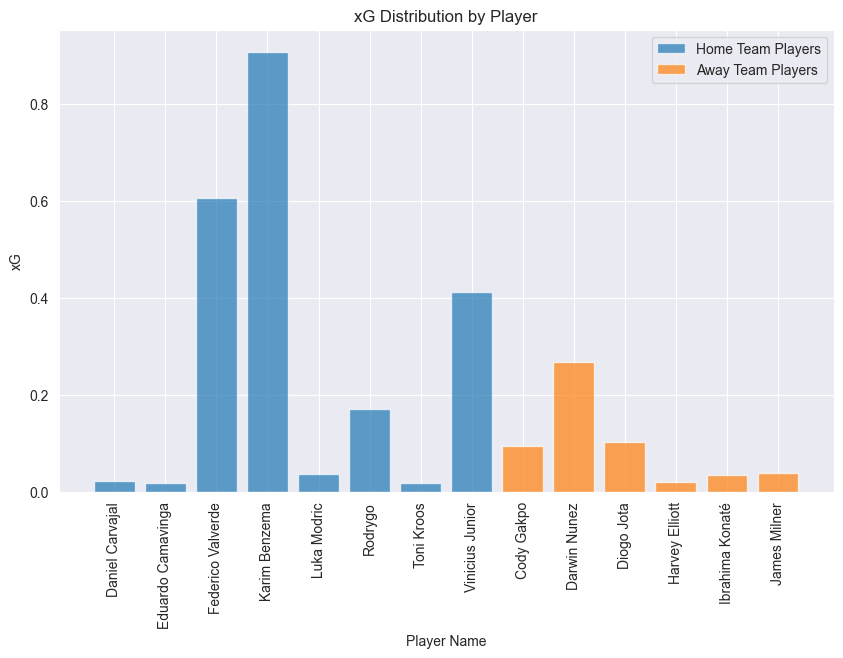

In [9]:

# Plot the xG distributions
fig, ax = plt.subplots(figsize=(10, 6))
# ax.bar(all_shooters.index, all_shooters.values, alpha=0.7, label='All Players')
ax.bar(home_shooters.index, home_shooters.values, alpha=0.7, label='Home Team Players')
ax.bar(away_shooters.index, away_shooters.values, alpha=0.7, label='Away Team Players')
ax.set_xlabel('Player Name')
ax.set_ylabel('xG')
ax.set_title('xG Distribution by Player')
ax.legend()
plt.xticks(rotation=90)
plt.show()

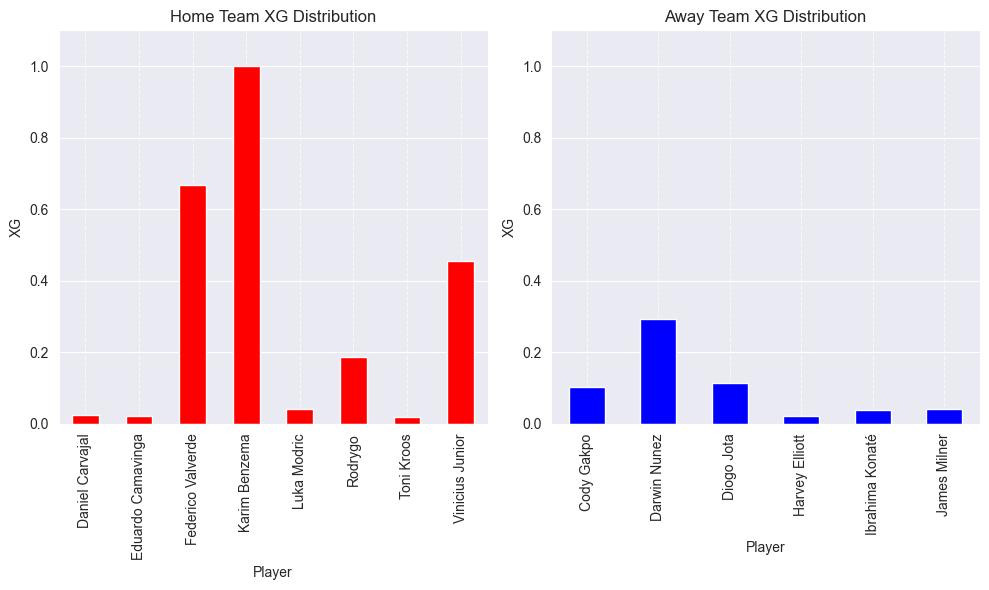

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))



# Scale both teams by maximum value in all_shooters
scale = all_shooters.max()

# Plot home team xG distribution
home_shooters_scaled = home_shooters / scale
home_shooters_scaled.plot(kind='bar', ax=ax1, color='red')
ax1.set_title('Home Team XG Distribution')
ax1.set_xlabel('Player')
ax1.set_ylabel('XG')
ax1.set_ylim([0, 1.1])  # Set y-axis limit to 1.1 for scaling

# Plot away team xG distribution
away_shooters_scaled = away_shooters / scale
away_shooters_scaled.plot(kind='bar', ax=ax2, color='blue')
ax2.set_title('Away Team XG Distribution')
ax2.set_xlabel('Player')
ax2.set_ylabel('XG')
ax2.set_ylim([0, 1.1])  # Set y-axis limit to 1.1 for scaling


# Add grid lines
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax2.grid(axis='x', linestyle='--', alpha=0.7)


# Adjust the layout
fig.tight_layout()

plt.show()


Team xG prop using prossion disturction

In [11]:
h_xG = home_df['xG'].tolist()
a_xG = away_df['xG'].tolist()

In [12]:
# Probabilities
max_goals =8

xghome = np.cumsum(h_xG)[-1]
xgaway = np.cumsum(a_xG)[-1]

gProbsHome = [poisson.pmf(i,xghome) for i in range(max_goals)]
gProbsAway = [poisson.pmf(i,xgaway) for i in range(max_goals)]

Home = np.round((np.array(gProbsHome) * 100),2)
Away = np.round((np.array(gProbsAway) * 100),2)

([<matplotlib.axis.YTick at 0x7f78817ffd00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

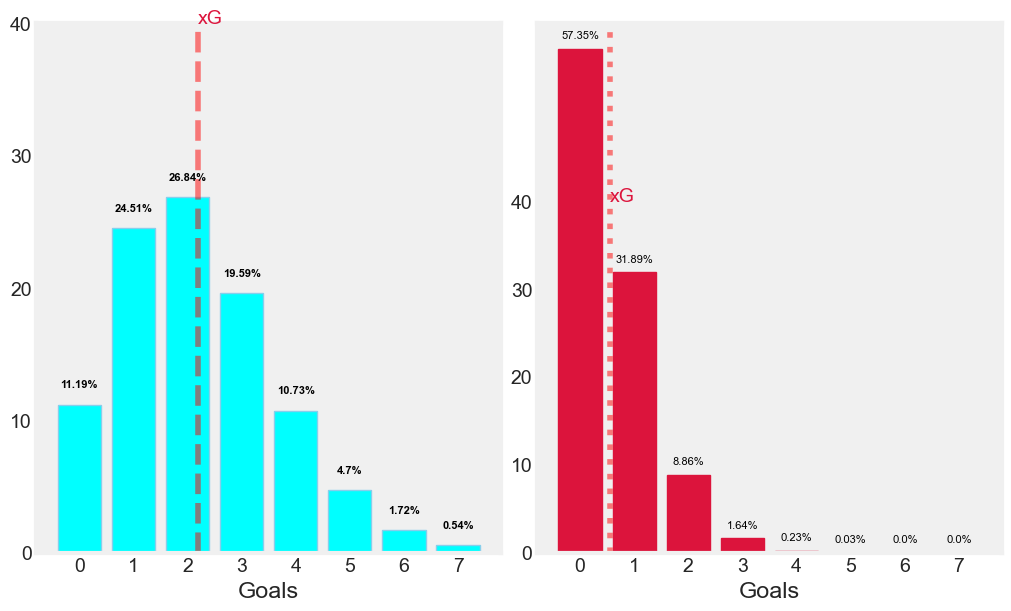

In [13]:
fig = plt.figure(figsize=(10,6),constrained_layout=True)
plt.style.use('fivethirtyeight')
gs = fig.add_gridspec(nrows=1,ncols=2)

# First plot
ax1 = fig.add_subplot(gs[0,0])
plt.bar(range(len(Home)),Home,color='cyan',edgecolor='skyblue', lw=1., zorder = 0)
plt.xticks(range(len(Home)))
plt.axvline(xghome,linestyle='--',color='red',alpha=0.5)
plt.text(xghome,40,'xG',color='crimson')
plt.xlabel('Goals')
plt.yticks([])
plt.grid(False)
for i in range(len(Home)):
    plt.annotate(str(Home[i])+"%", (range(len(Home))[i], Home[i]+1.5),c='black',size=8,ha='center',va='center',fontweight='bold')
plt.yticks(np.linspace(0,40,5))



# Second plot
ax2 = fig.add_subplot(gs[0,1])
plt.bar(range(len(Away)),Away,color='crimson',edgecolor='crimson', lw=1., zorder = 0)
plt.xticks(range(len(Away)))
plt.axvline(xgaway,linestyle=':',color='red',alpha=0.5)
plt.text(xgaway,40,'xG',color='crimson')
plt.xlabel('Goals')
plt.yticks([])
plt.grid(False)
for i in range(len(Away)):
    plt.annotate(str(Away[i])+"%", (range(len(Away))[i], Away[i]+1.5),c='black',size=8,ha='center',va='center')
plt.yticks(np.linspace(0,40,5))



Match Outcome Odds


In [14]:

# Function to calculate the Poisson distribution for all possible scoring outcomes
def poissonwp(xg_home, xg_away):
    # Calculate the expected goals for each team
    mu_home = np.sum(xg_home)
    mu_away = np.sum(xg_away)

    # Calculate the Poisson win probabilities for each team
    home_win_prob = np.sum(poisson.pmf(range(9), mu_home) * (1 - poisson.pmf(range(9), mu_away)))
    away_win_prob = np.sum(poisson.pmf(range(9), mu_away) * (1 - poisson.pmf(range(9), mu_home)))

    # Calculate the draw probability
    draw_prob = np.sum(poisson.pmf(range(9), mu_home) * poisson.pmf(range(9), mu_away))

    # Normalize the probabilities to sum to 1
    total_prob = home_win_prob + away_win_prob + draw_prob
    home_win_prob /= total_prob
    away_win_prob /= total_prob
    draw_prob /= total_prob

    # Return the win probabilities and draw probability
    return {'homewin': home_win_prob, 'awaywin': away_win_prob, 'draw': draw_prob}


In [15]:
winprobs = poissonwp(h_xG,a_xG)


In [16]:
import random
def calculateWinner(home, away):
    HomeGoals = 0
    AwayGoals = 0

    def testShots(shots):
        Goals = 0

        for shot in shots:
            if random.random() <= shot:
                Goals += 1
        return Goals

    HomeGoals = testShots(home)
    AwayGoals = testShots(away)

    #This is all that changes from above
    #We now pass a simple string, rather than ask for a print out.
    if HomeGoals > AwayGoals:
        return("home")
    elif AwayGoals > HomeGoals:
        return("away")
    else:
        return("draw")



In [17]:
calculateWinner(h_xG,a_xG)

'home'

In [18]:

#Run xG calculator 10000 times to test winner %
def calculateChance(team1, team2):
    home = 0;
    away = 0;
    draw = 0;

    for i in range(0,10000):
        matchWinner = calculateWinner(team1,team2)
        if matchWinner == "home":
            home +=1
        elif matchWinner == "away":
            away +=1
        else:
            draw +=1
    home = home/100
    away = away/100
    draw = draw/100
    print("Over 10000 games, home wins {}%, away wins {}% and there is a draw in {}% of games.".format(home, away, draw))
    # return home, away, draw



In [19]:
calculateChance(h_xG,a_xG)

Over 10000 games, home wins 79.46%, away wins 5.57% and there is a draw in 14.97% of games.


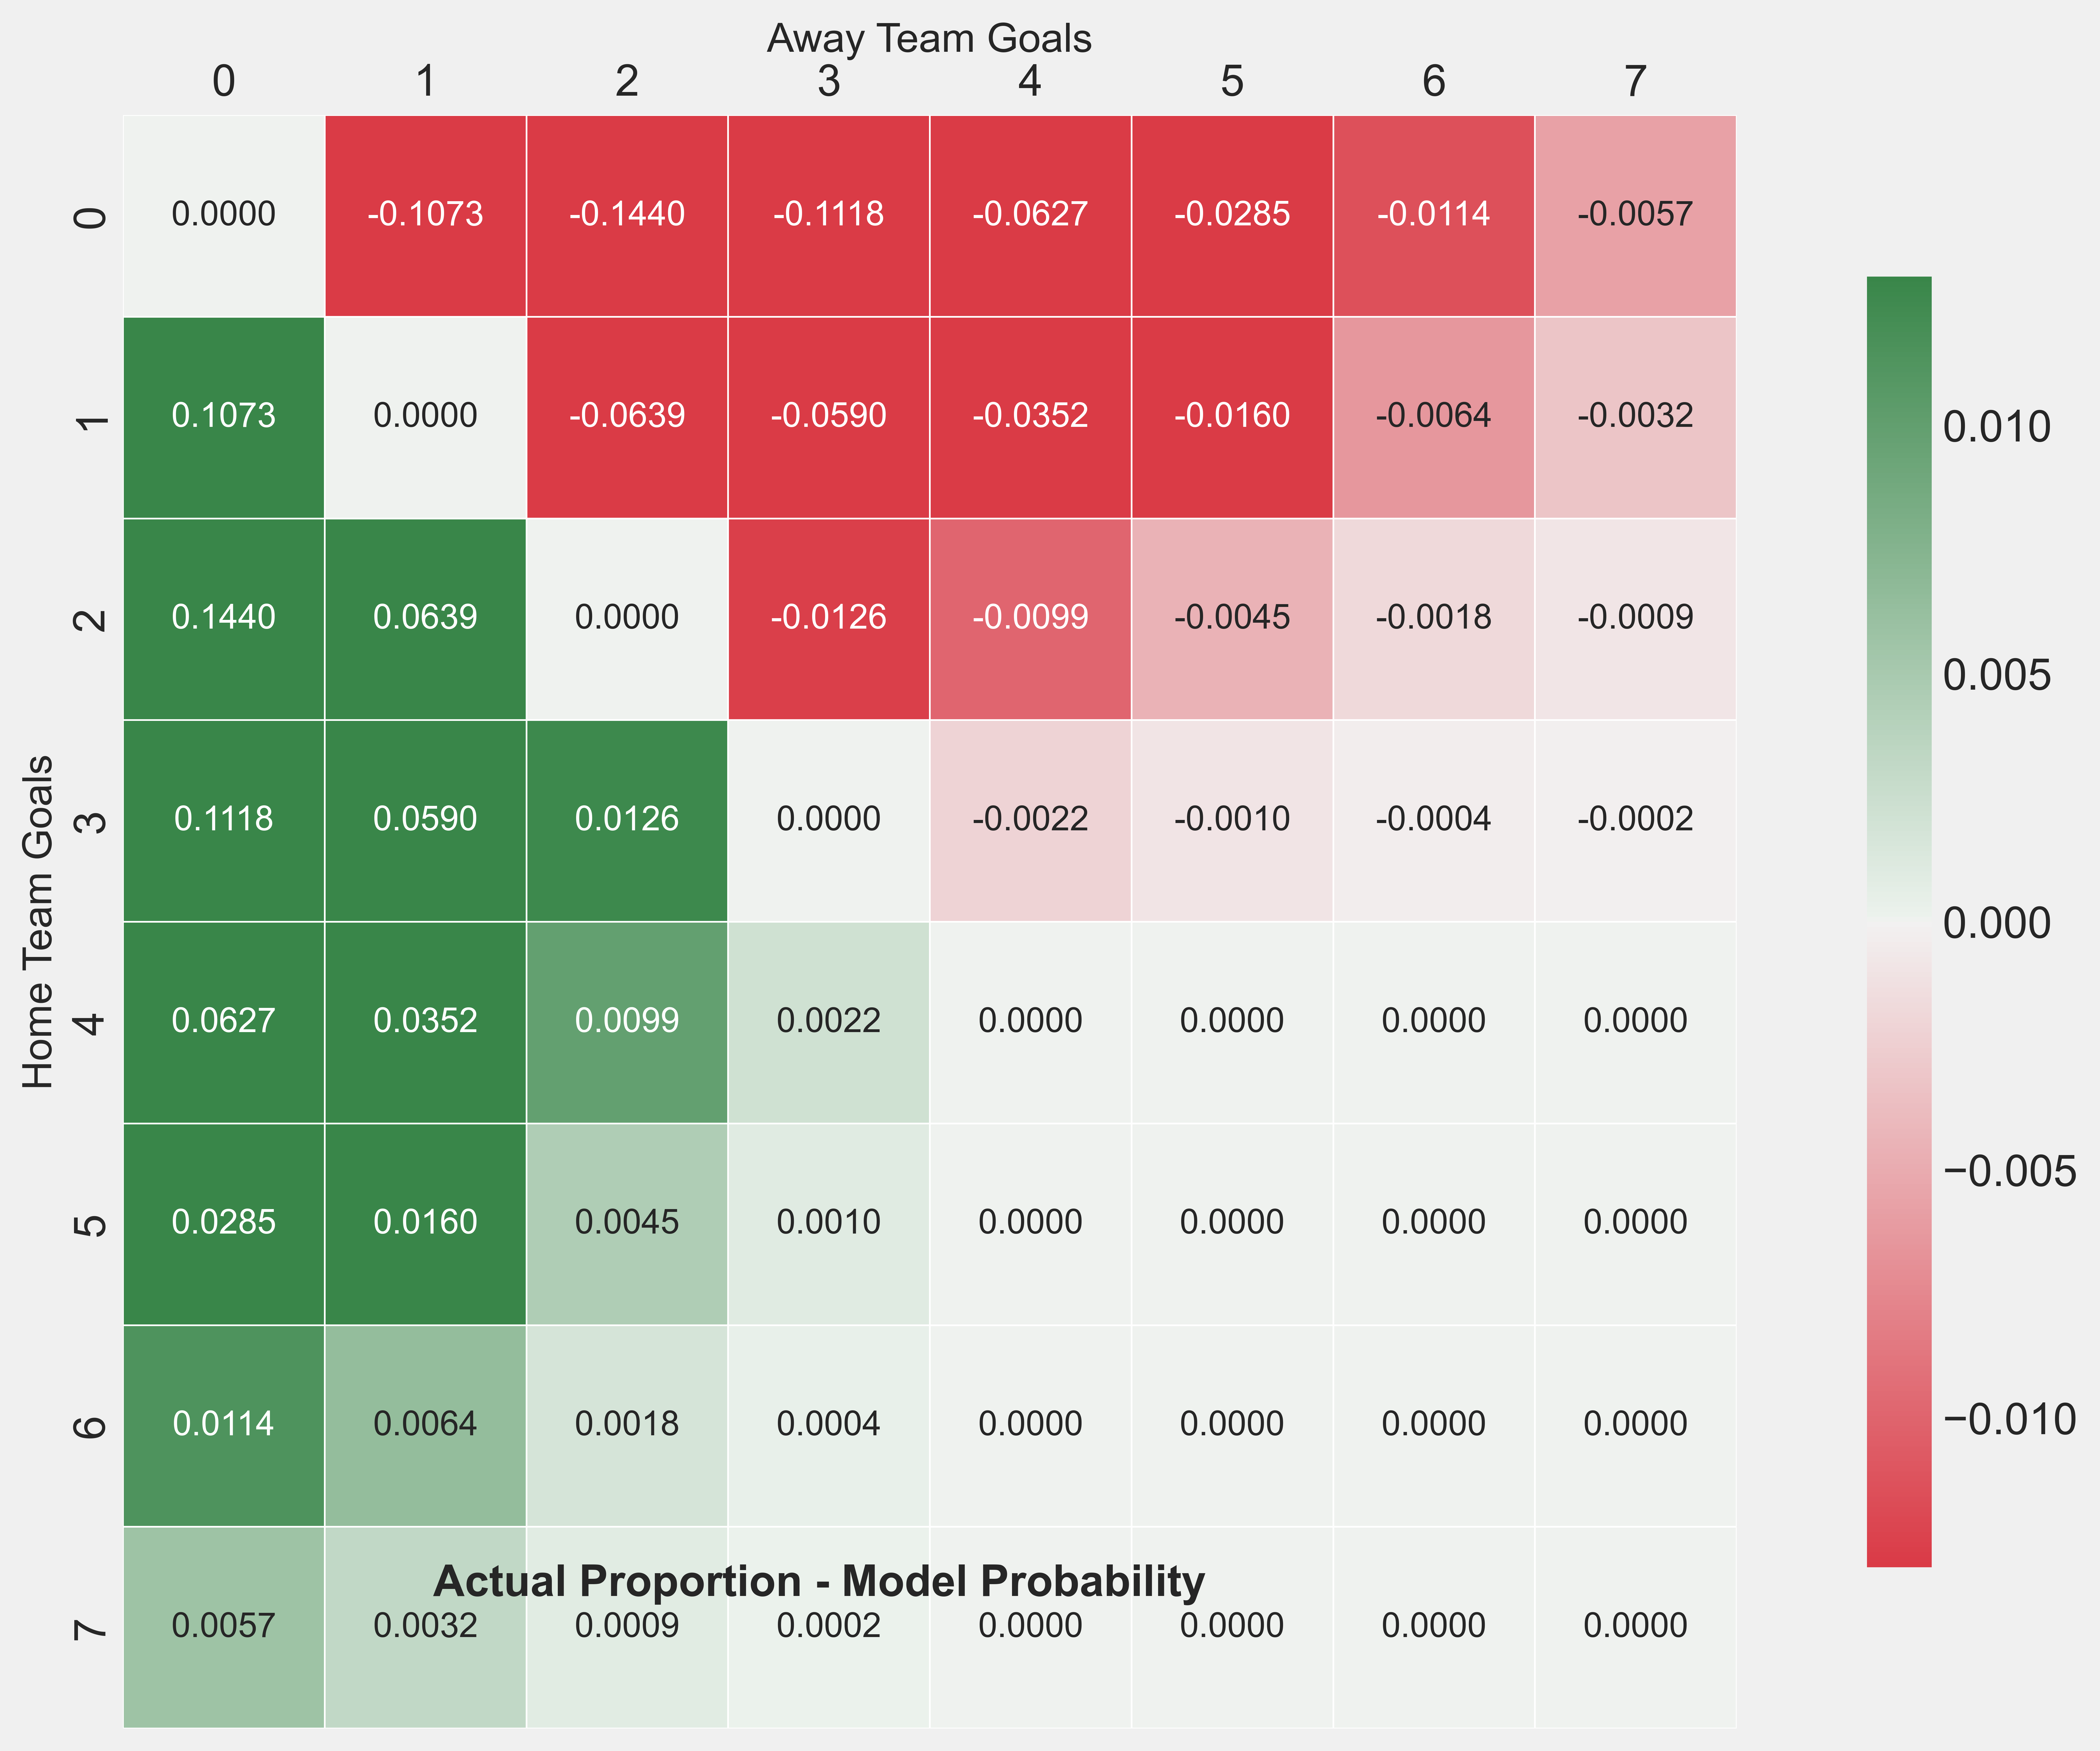

In [22]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

max_goals = 8

xghome = np.cumsum(h_xG)[-1]
xgaway = np.cumsum(a_xG)[-1]

gProbsHome = [poisson.pmf(i, xghome) for i in range(max_goals)]
gProbsAway = [poisson.pmf(i, xgaway) for i in range(max_goals)]

Home = np.round((np.array(gProbsHome) ), 2)
Away = np.round((np.array(gProbsAway) ), 2)

matrix = np.zeros((max_goals, max_goals))

for i in range(max_goals):
    for j in range(max_goals):
        matrix[i, j] = Home[i] * Away[j]

diff_matrix = matrix - matrix.T

cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(12,8),dpi=800)
with sns.axes_style("white"):
    ax = sns.heatmap(diff_matrix, annot=True, fmt='.4f', cmap=cmap, vmin=-0.013, vmax=.013, center=0.00,
                     square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})


ax.tick_params(axis=u'both', which=u'both',length=0)
ax.grid(which='major', axis='both', linestyle='')
ax.set_xlabel('Away Team Goals', fontsize=13)
ax.set_ylabel('Home Team Goals', fontsize=13)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.figtext(0.45, 0.1, 'Actual Proportion - Model Probability', horizontalalignment='center',
            fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()

plt.show()
